In [1]:
from proveit.basiclogic import autoSubstitute, autoSubstitution, In, Equation, And, compose
from proveit.number.arithmeticOps import *
from proveit.common import a, b, k, l, r, x, eps
from proveit.number import Exponentiate, Add, Subtract, Multiply, Abs
from proveit.number.common import *
from proveit.physics.quantum.QPE.axioms import tInNaturalsPos, modAddDef
from proveit.physics.quantum.QPE.theorems import fail_ineq, posDomainInFullDomain, negDomainInFullDomain, \
    two_pow_tMinusOne_in_posnats, phaseInReals, all_alpha_l_in_complexes, all_abs_alpha_l_nonneg, deltaInReals, scaledDeltaInInterval, \
    scaledDelta_notEq_nonzeroInt, alpha_l_sqrd_ineq, fail_sum
from proveit.physics.quantum.QPE.common import alpha_l, alpha_l_sqrd, t_, delta_, two_pow_t_minus_one, \
    fullDomain, negDomain, posDomain, epsDomain
from proveit.physics.quantum.QPE.phaseEstOps import Psuccess, Pfail, ModAdd
from proveit.number.complex.theorems import cancelSubAndAdd, negNeg, cancelAddNeg, addNegAsSubtract, \
    subTwoAddOne, addTwice
from proveit.number.natural.axioms import oneAddOne
from proveit.number.integer.theorems import sumIneq1, indexShift, sumEq, evenFuncSum, sumIntegrateIneq1
from proveit.number.relation import Relation
from proveit.number.real.theorems import sumFactor_temp, sumIneq2, ineqThm5, ineqThm6a, ineqThm7a, ineqThm8a, \
    simplifyQuarterTimesTwo, boundedInvSqrdIntegral, inverseSqrdIsEvenFunc, inverseSqrdIsMonDecFunc
from proveit.basiclogic.set import Union
from IPython.display import display

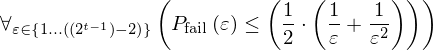

In [2]:
fail_ineq.beginProof()

In [3]:
def showExprTree(expr, indent = ''):
    print indent + str(expr.__class__) + ": " + str(expr)
    for subExpr in expr._subExpressions:
        showExprTree(subExpr, indent + '  ')

In [4]:
epsInDomain = In(eps, epsDomain)
display(epsInDomain)
display(epsDomain.deduceMemberInNaturalsPos(eps).proven({epsInDomain}))
epsLowerBound = epsDomain.deduceMemberLowerBound(eps).deriveReversed().proven({epsInDomain})
display(epsLowerBound)
epsUpperBound = epsDomain.deduceMemberUpperBound(eps).proven({epsInDomain})
display(epsUpperBound)

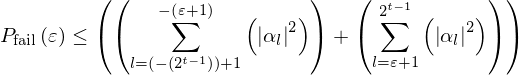

In [5]:
fail_sum_special = fail_sum.specialize().proven({epsInDomain})
fail_sum_special

In [6]:
display(negDomain)
display(posDomain)
display(fullDomain)

In [7]:
lInDomain = In(l, fullDomain)
lNotZero = NotEquals(l, zero)
display(lInDomain)
display(lNotZero)


In [8]:
display(negDomainInFullDomain.specialize().specialize().proven({epsInDomain, In(l, negDomain)}))
display(posDomainInFullDomain.specialize().specialize().proven({epsInDomain, In(l, posDomain)}))
display(negDomain.deduceMemberInIntegers(l, {epsInDomain}).proven({epsInDomain, In(l,negDomain)}))
display(posDomain.deduceMemberInIntegers(l, {epsInDomain}).proven({epsInDomain, In(l,posDomain)}))

In [9]:
lInNegDomainIsNeg = negDomain.deduceMemberIsNegative(l, {epsInDomain})
display(lInNegDomainIsNeg.proven({epsInDomain, In(l, negDomain)}))
display(lInNegDomainIsNeg.deriveRelaxed({epsInDomain, In(l, negDomain)}).proven({epsInDomain, In(l, negDomain)}))
display(posDomain.deduceMemberIsPositive(l, {epsInDomain}).proven({epsInDomain, In(l, posDomain)}))

In [10]:
epsPlusOneIneq = Add(eps, one).deduceStrictIncrease(1, {epsInDomain}).proven({epsInDomain})
display(epsPlusOneIneq)
posDomainLowerBound = posDomain.deduceMemberLowerBound(l, {epsInDomain}).deriveReversed()
display(posDomainLowerBound)
posDomainGreaterThanOne = posDomainLowerBound.applyTransitivity(epsPlusOneIneq).proven({epsInDomain, In(l, posDomain)})
display(posDomainGreaterThanOne)
display(deducePositive(Subtract(l, one), {epsInDomain, In(l, posDomain)}).proven({epsInDomain, In(l, posDomain)}))


In [11]:
display(deduceNotZero(l, {epsInDomain, In(l, negDomain)}).proven({epsInDomain, In(l, negDomain)}))
display(deduceNotZero(l, {epsInDomain, In(l, posDomain)}).proven({epsInDomain, In(l, posDomain)}))

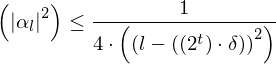

In [12]:
Y0 = alpha_l_sqrd_ineq.specialize().proven({lInDomain, lNotZero})
Y0

In [13]:
scaledDelta_notEq_nonzeroInt

In [14]:
display(scaledDelta_notEq_nonzeroInt.specialize().proven({epsInDomain, In(l, posDomain)}))
display(scaledDelta_notEq_nonzeroInt.specialize().proven({epsInDomain, In(l, negDomain)}))

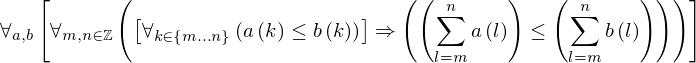

In [15]:
sumIneq1

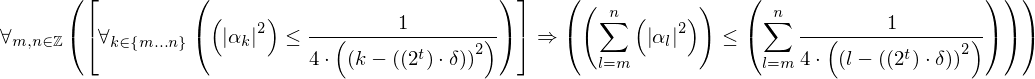

In [16]:
Y1a = sumIneq1.specialize({Operation(a,l):alpha_l_sqrd, Operation(b,l):Y0.rhs}).proven()
Y1a

In [17]:
display(negDomain.lowerBound.deduceInIntegers().proven())
display(negDomain.upperBound.deduceInIntegers({epsInDomain}).proven({epsInDomain}))

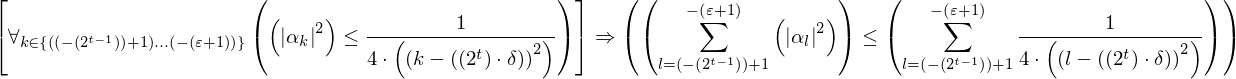

In [18]:
Y1 = Y1a.specialize({m:negDomain.lowerBound, n:negDomain.upperBound}).proven({epsInDomain})
Y1

In [19]:
display(posDomain.lowerBound.deduceInIntegers({epsInDomain}).proven({epsInDomain}))
display(posDomain.upperBound.deduceInIntegers().proven({epsInDomain}))

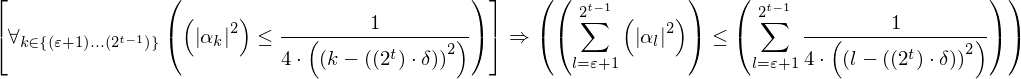

In [20]:
Y2 = Y1a.specialize({m:posDomain.lowerBound, n:posDomain.upperBound}).proven({epsInDomain})
Y2

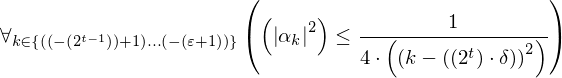

In [21]:
Y0_negDomain = Y0.generalize(l, domain=negDomain).proven({epsInDomain})
Y0_negDomain.relabel({l:k})

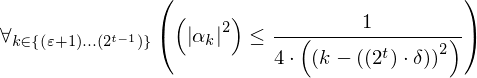

In [22]:
Y0_posDomain = Y0.generalize(l, domain=posDomain).proven({epsInDomain})
Y0_posDomain.relabel({l:k})

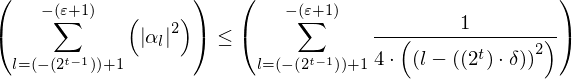

In [23]:
Y1.conclusion.proven({epsInDomain})

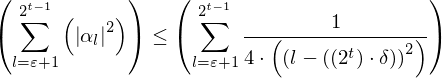

In [24]:
Y2.conclusion.proven({epsInDomain})

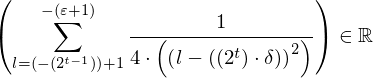

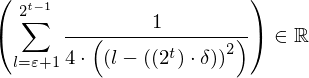

In [25]:
display(Y1.conclusion.rhs.deduceInReals({epsInDomain, lInDomain}).proven({epsInDomain, lInDomain}))
display(Y2.conclusion.rhs.deduceInReals({epsInDomain, lInDomain}).proven({epsInDomain, lInDomain}))

In [26]:
display(all_alpha_l_in_complexes.specialize())
abs_alpha_l_real_and_nonneg = all_abs_alpha_l_nonneg.specialize().decompose()
display(abs_alpha_l_real_and_nonneg[0])
display(abs_alpha_l_real_and_nonneg[1])

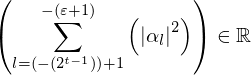

In [27]:
fail_sum_special.rhs.operands[0].deduceInReals({epsInDomain, lInDomain}).proven({epsInDomain, lInDomain})

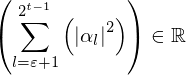

In [28]:
fail_sum_special.rhs.operands[1].deduceInReals({epsInDomain, lInDomain}).proven({epsInDomain, lInDomain})

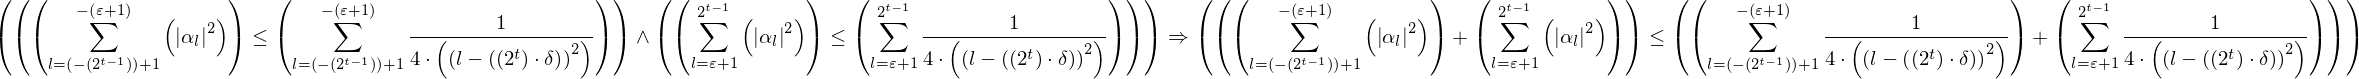

In [29]:
Y3 = sumIneq2.specialize({a:fail_sum_special.rhs.operands[0], b:fail_sum_special.rhs.operands[1], c:Y1.conclusion.rhs, d:Y2.conclusion.rhs}).proven({epsInDomain})
Y3

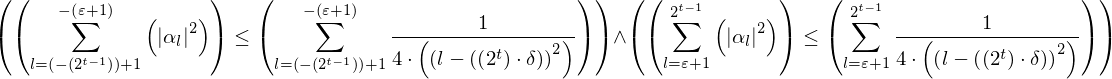

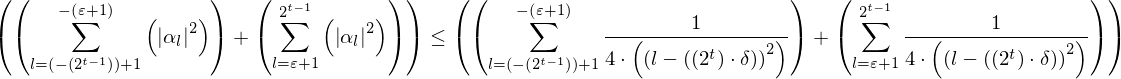

In [30]:
Q = Y3.hypothesis.concludeViaComposition().proven({epsInDomain})
display(Q)
display(Y3.conclusion.proven({epsInDomain}))

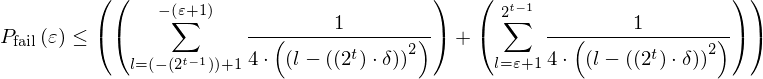

In [31]:
X1 = Relation(fail_sum_special).update(Y3.conclusion).proven({epsInDomain})
X1

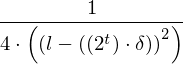

In [32]:
X1_summand = X1.rhs.operands[0].summand
X1_summand

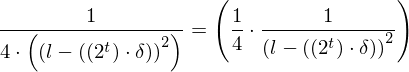

In [33]:
Y4 = X1_summand.factor(Fraction(one,four),'left',assumptions={epsInDomain, In(l, posDomain)}).proven({epsInDomain, In(l, posDomain)})
X1_summand.factor(Fraction(one,four),'left',assumptions={epsInDomain, In(l, negDomain)}).proven({epsInDomain, In(l, negDomain)})
Y4

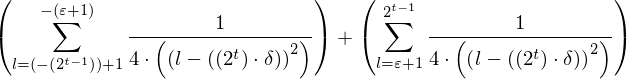

In [34]:
X1.rhs

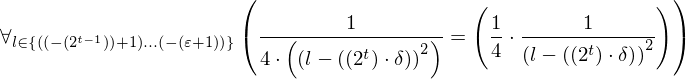

In [35]:
Y4_sum1equivForAllInstances = Y4.generalize(l,negDomain)
Y4_sum1equivForAllInstances.proven({epsInDomain})

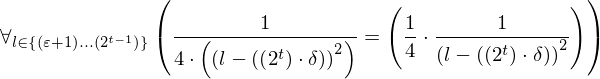

In [36]:
Y4_sum2equivForAllInstances = Y4.generalize(l,posDomain)
Y4_sum2equivForAllInstances.proven({epsInDomain})

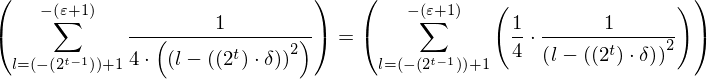

In [37]:
Y5_sum1 = X1.rhs.operands[0].instanceSubstitution(Y4_sum1equivForAllInstances)
Y5_sum1.proven({epsInDomain})

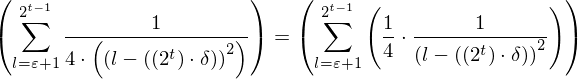

In [38]:
Y5_sum2 = X1.rhs.operands[1].instanceSubstitution(Y4_sum2equivForAllInstances)
Y5_sum2.proven({epsInDomain})

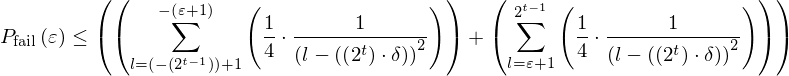

In [39]:
X2 = Y5_sum1.rhsSubstitute(X1)
X3 = Y5_sum2.rhsSubstitute(X2)
X3.proven({epsInDomain})

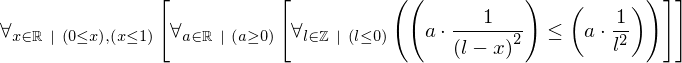

In [40]:
ineqThm7a

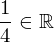

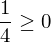

In [41]:
display(Fraction(one,four).deduceInReals().proven())
display(deducePositive(Fraction(one, four)).deriveRelaxed().proven())

In [42]:
display(scaledDeltaInInterval.domain.deduceMemberLowerBound(scaledDeltaInInterval.element).proven())
display(scaledDeltaInInterval.domain.deduceMemberUpperBound(scaledDeltaInInterval.element).deriveRelaxed().proven())

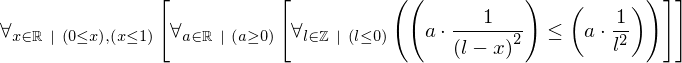

In [43]:
ineqThm7a

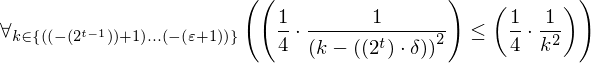

In [44]:
Y6 = ineqThm7a.specialize({x:Multiply(Exponentiate(two,t_), delta_)}).specialize({a:Fraction(one,four)})
Y6.specialize().generalize(l, domain=negDomain).relabel({l:k}).proven({epsInDomain})

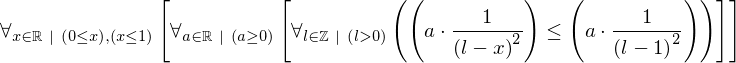

In [45]:
ineqThm8a

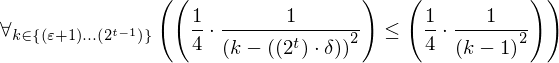

In [46]:
Y7 = ineqThm8a.specialize({x:Multiply(Exponentiate(two,t_), delta_)}).specialize({a:Fraction(one,four)}).proven()
Y7.specialize().generalize(l, domain=posDomain).relabel({l:k}).proven({epsInDomain})

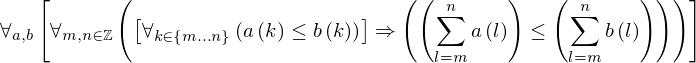

In [47]:
sumIneq1

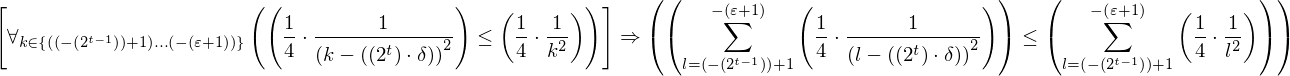

In [48]:
Y8 = sumIneq1.specialize({Operation(a,l):Y6.specialize().lhs, Operation(b,l):Y6.specialize().rhs}).specialize({m:negDomain.lowerBound, n:negDomain.upperBound})
Y8.proven({epsInDomain})

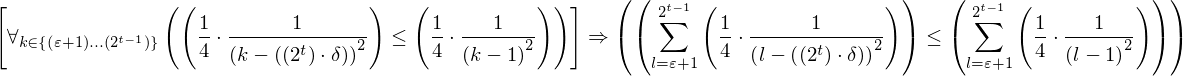

In [49]:
Y9 = sumIneq1.specialize({Operation(a,l):Y7.specialize().lhs, Operation(b,l):Y7.specialize().rhs}).specialize({m:posDomain.lowerBound, n:posDomain.upperBound})
Y9.proven({epsInDomain})

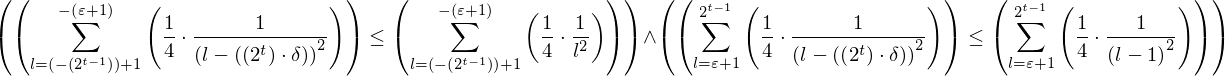

In [50]:
compose(Y8.conclusion, Y9.conclusion).proven({epsInDomain})

In [51]:
sumIneq2

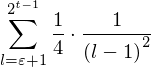

In [52]:
Y9.conclusion.rhs

In [53]:
deducePositive(Subtract(l, one), assumptions={epsInDomain, In(l, posDomain)})

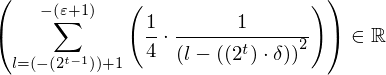

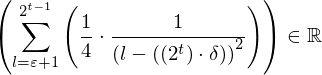

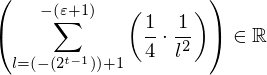

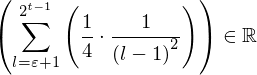

In [54]:
display(X3.rhs.operands[0].deduceInReals({epsInDomain}))
display(X3.rhs.operands[1].deduceInReals({epsInDomain}))
display(Y8.conclusion.rhs.deduceInReals({epsInDomain}))
display(Y9.conclusion.rhs.deduceInReals({epsInDomain}))

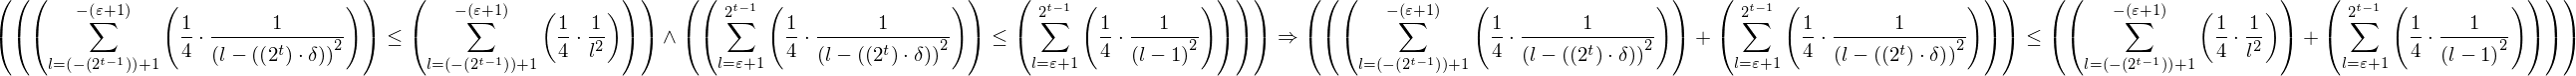

In [55]:
Y10 = sumIneq2.specialize({a:X3.rhs.operands[0], b:X3.rhs.operands[1], c:Y8.conclusion.rhs, d:Y9.conclusion.rhs})
Y10.proven({In(Y9.conclusion.rhs,Reals), epsInDomain, lInDomain})

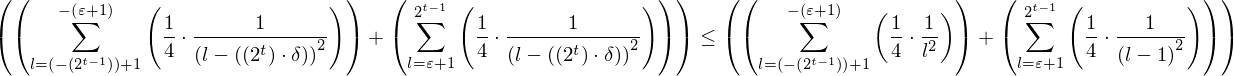

In [56]:
Y10.conclusion.proven({epsInDomain, lInDomain})

In [57]:
X4 = Relation(X3).update(Y10.conclusion)
epsInDomain

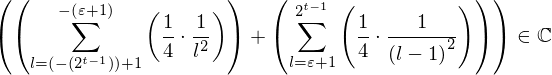

In [58]:
deduceInComplexes(X4.rhs, {epsInDomain}).proven({epsInDomain})

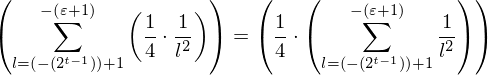

In [59]:
X4.rhs.operands[0].factor(Fraction(one,four),assumptions={epsInDomain})

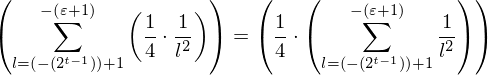

In [60]:
X4.rhs.operands[0].factor(Fraction(one,four),assumptions={epsInDomain}).proven({epsInDomain})

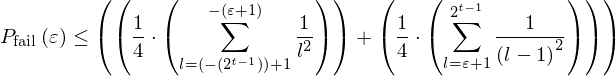

In [61]:
X5 = X4.rhs.operands[0].factor(Fraction(one,four),assumptions={epsInDomain}).rhsSubstitute(X4).proven({epsInDomain})
X6 = X5.rhs.operands[1].factor(Fraction(one,four),assumptions={epsInDomain}).rhsSubstitute(X5).proven({epsInDomain})
X6

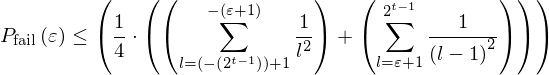

In [62]:
X7 = X6.rhs.factor(Fraction(one, four), pull='left', assumptions={epsInDomain}).rhsSubstitute(X6)
X7.proven({epsInDomain})

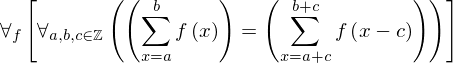

In [63]:
indexShift

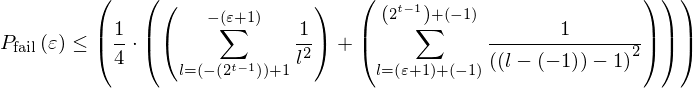

In [64]:
deduceInIntegers(negDomain.lowerBound, {epsInDomain})
deduceInIntegers(negDomain.upperBound, {epsInDomain})
deduceInIntegers(Neg(one))
Y11 = indexShift.specialize({Operation(f,l):X7.rhs.operands[1].operands[1].summand,x:l}).specialize({c:Neg(one),a:X7.rhs.operands[1].operands[1].domain.lowerBound, b:X7.rhs.operands[1].operands[1].domain.upperBound}).rhsSubstitute(X7)
Y11.proven({epsInDomain})

In [65]:
shiftedDomain = Y11.rhs.operands[1].operands[1].domain
shiftedDomain

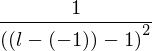

In [66]:
summandToSimplify = Y11.rhs.operands[1].operands[1].summand
summandToSimplify

In [67]:
cancelSubAndAdd

In [68]:
lShiftCancellation = cancelSubAndAdd.specialize({a:l,b:one})
lShiftCancellation

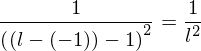

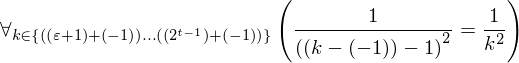

In [69]:
display(shiftedDomain.deduceMemberInIntegers(l, {epsInDomain}).proven({epsInDomain, In(l, shiftedDomain)}))
display(deduceInComplexes(lShiftCancellation.lhs, {epsInDomain, In(l, shiftedDomain)}))
display(deduceInComplexes(lShiftCancellation.rhs, {epsInDomain, In(l, shiftedDomain)}))
summandSimplification = lShiftCancellation.substitution(summandToSimplify)
display(summandSimplification)
summandSimplification.generalize(l, domain=shiftedDomain).relabel({l:k}).proven({epsInDomain})

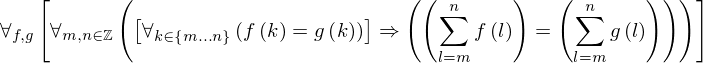

In [70]:
sumEq

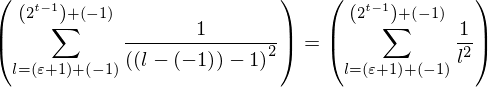

In [71]:
deduceInIntegers(shiftedDomain.lowerBound, {epsInDomain})
deduceInIntegers(shiftedDomain.upperBound, {epsInDomain})
Y12 = sumEq.specialize({Operation(f,l):summandToSimplify, Operation(g,l):summandSimplification.rhs}).specialize({m:shiftedDomain.lowerBound, n:shiftedDomain.upperBound})
Y12.conclusion.proven({epsInDomain})

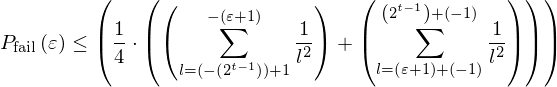

In [72]:
X8 = Y12.conclusion.rhsSubstitute(Y11)
X8.proven({epsInDomain})

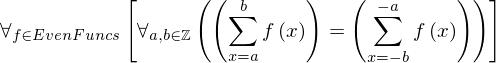

In [73]:
evenFuncSum

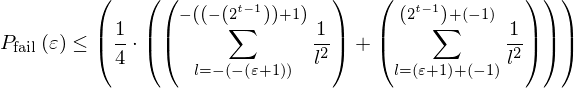

In [74]:
X9 = evenFuncSum.specialize({Operation(f,l):X8.rhs.operands[1].operands[0].summand, x:l}).specialize({a:X8.rhs.operands[1].operands[0].domain.lowerBound, b:X8.rhs.operands[1].operands[0].domain.upperBound}).rhsSubstitute(X8)
X9.proven({epsInDomain})

In [75]:
cleanLimits1a = X9.rhs.operands[1].terms[0].domain.upperBound.distribute()
cleanLimits1a.proven()

In [76]:
cleanLimits1 = cleanLimits1a.rhs.subtractionFolding(1).rhsSubstitute(cleanLimits1a)
cleanLimits1.proven()

In [77]:
cleanLimits2 = X9.rhs.operands[1].terms[0].domain.lowerBound.simplification({epsInDomain})
cleanLimits2.proven({epsInDomain})

In [78]:
cleanLimits3 = addNegAsSubtract.specialize({x:two_pow_t_minus_one, y:one})
cleanLimits3.proven({epsInDomain})

In [79]:
deduceInComplexes(eps, {epsInDomain})
cleanLimits4 = cancelAddNeg.specialize({a:eps, b:one})
cleanLimits4.proven({epsInDomain})

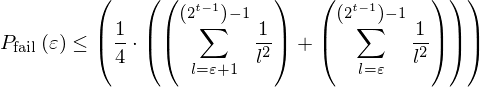

In [80]:
X10 = cleanLimits1.rhsSubstitute(X9)
X10 = cleanLimits2.rhsSubstitute(X10)
X10 = cleanLimits3.rhsSubstitute(X10)
X10 = cleanLimits4.rhsSubstitute(X10)
X10.proven({epsInDomain})

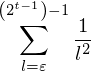

In [81]:
X10secondSummation = X10.rhs.operands[1].operands[1]
X10secondSummation

In [82]:
X10secondSummation.domain.deduceMemberInIntegers(l, {epsInDomain}).proven({epsInDomain, In(l, X10secondSummation.domain)})

In [83]:
X10secondSummationLowerBound = X10secondSummation.domain.deduceMemberLowerBound(l, {epsInDomain})
X10secondSummationLowerBound.proven({epsInDomain, In(l, X10secondSummation.domain)})

In [84]:
deducePositive(eps, {epsInDomain}).applyTransitivity(X10secondSummationLowerBound)

In [85]:
epsStrictUpperBound1 = Add(epsUpperBound.rhs, one).deduceStrictIncrease(0, {epsInDomain}).applyTransitivity(epsUpperBound)
epsStrictUpperBound1.proven({epsInDomain})

In [86]:
epsStrictUpperBound2 = epsStrictUpperBound1.applyTransitivity(subTwoAddOne.specialize({a:two_pow_t_minus_one}))
epsStrictUpperBound2.proven({epsInDomain})

In [87]:
epsStrictUpperBound = epsStrictUpperBound2.deriveReversed()
epsStrictUpperBound.proven({epsInDomain})

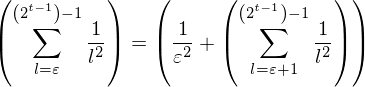

In [88]:
Y13 = X10.rhs.operands[1].operands[1].splitOffFirst({epsInDomain})
Y13.proven({epsInDomain})

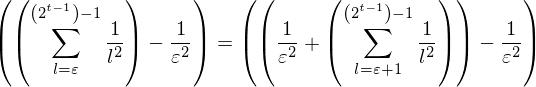

In [89]:
Y14 = Y13.substitution(Subtract(X, Fraction(one, Exponentiate(eps, two))), X)
Y14.proven({epsInDomain})

In [90]:
X10firstSummation = X10.rhs.operands[1].operands[0]
X10firstSummationLowerBound = X10firstSummation.domain.deduceMemberLowerBound(l, {epsInDomain})
X10firstSummationLowerBound.proven({epsInDomain, In(l, X10firstSummation.domain)})

In [91]:
X10firstSummationStrictLowerBound = X10firstSummationLowerBound.lhs.deduceStrictIncrease(0, {epsInDomain}).applyTransitivity(X10firstSummationLowerBound)
X10firstSummationStrictLowerBound.proven({epsInDomain, In(l, X10firstSummation.domain)})

In [92]:
deducePositive(eps, {epsInDomain}).applyTransitivity(X10firstSummationStrictLowerBound).proven({epsInDomain, In(l, X10firstSummation.domain)})

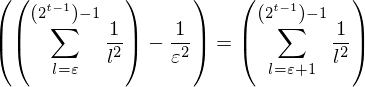

In [93]:
Y15 = Y14.rhs.cancel(assumptions={epsInDomain}).rhsSubstitute(Y14)
Y15.proven({epsInDomain})

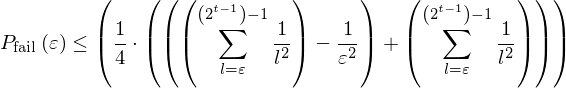

In [94]:
X11 = Y15.lhsSubstitute(X10)
X11.proven({epsInDomain})

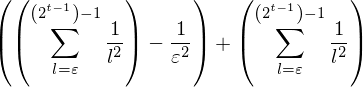

In [95]:
termToBound = X11.rhs.operands[1]
groupAndUngroupAssumptions = {In(eps,Complexes), In(termToBound.operands[1],Complexes), NotEquals(eps,zero)}
termToBound

In [96]:
shiftedPosDomain = termToBound.operands[0].operands[0].domain
shiftedPosDomain

In [97]:
display(shiftedPosDomain.deduceMemberInIntegers(l, {epsInDomain, 
                                                    In(l, shiftedPosDomain)}).proven({epsInDomain, In(l, shiftedPosDomain)}))
lGreaterThanEps = shiftedPosDomain.deduceMemberLowerBound(l, {epsInDomain}).deriveReversed()
display(lGreaterThanEps.applyTransitivity(deducePositive(eps, {epsInDomain})).proven({epsInDomain, In(l, shiftedPosDomain)}))

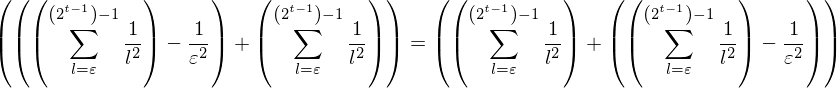

In [98]:
Y16 = termToBound.commute(assumptions={epsInDomain})
Y16.proven({epsInDomain})

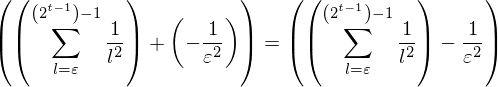

In [99]:
deduceInComplexes(termToBound.operands[0].operands[0], {epsInDomain})
deduceInComplexes(termToBound.operands[0].operands[1], {epsInDomain})
Y17 = addNegAsSubtract.specialize({x:termToBound.operands[0].operands[0],y:termToBound.operands[0].operands[1]})
Y17.proven({epsInDomain})

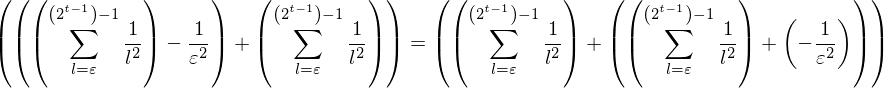

In [100]:
eqn = Equation(Y16)
Y18 = eqn.update(Y17.deriveReversed().substitution(Y16.rhs)).proven({epsInDomain})
Y18

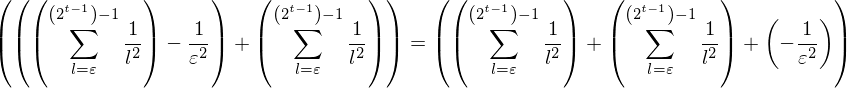

In [101]:
Y19 = eqn.update(Y18.rhs.ungroup(1, {epsInDomain}))
Y19.proven({epsInDomain})

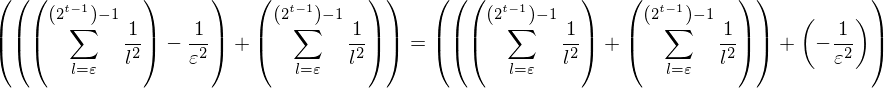

In [102]:
Y20 = Equation(Y19).update(Y19.rhs.group(0,2, assumptions=groupAndUngroupAssumptions))
Y20.proven({epsInDomain})

In [103]:
addTwice

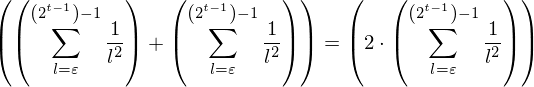

In [104]:
deduceInComplexes(Y19.rhs.operands[0], {epsInDomain})
Y21 = addTwice.specialize({a:Y19.rhs.operands[0]})
Y21.proven({epsInDomain})

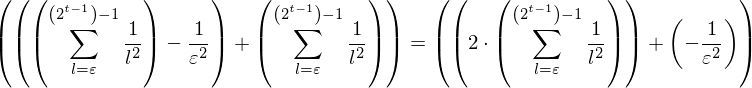

In [105]:
Y22 = Y21.rhsSubstitute(Y20)
Y22.proven({epsInDomain})

In [106]:
ineqThm6a

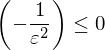

In [107]:
deduceNegative(Y22.rhs.operands[1], {epsInDomain}).deriveRelaxed({epsInDomain})

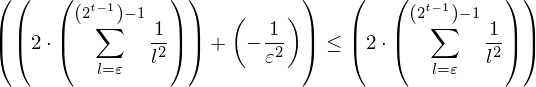

In [108]:
deduceInReals(Y22.rhs.operands[0], {epsInDomain})
deduceInReals(Y22.rhs.operands[1], {epsInDomain})
Y23 = ineqThm6a.specialize({a:Y22.rhs.operands[0], b:Y22.rhs.operands[1]})
Y23.proven({epsInDomain})

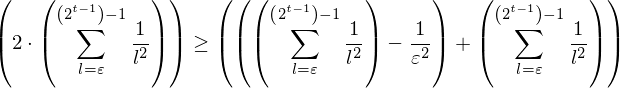

In [109]:
Y24 = Relation(Y22).update(Y23).deriveReversed()
Y24.proven({epsInDomain})

In [110]:
ineqThm5

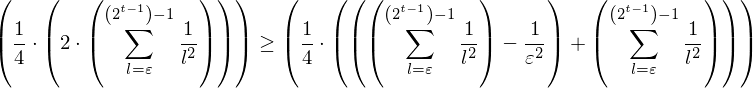

In [111]:
deduceInReals(Y24.lhs, {epsInDomain})
deduceInReals(Y24.rhs, {epsInDomain})
Y25 = ineqThm5.specialize({a:Y24.lhs, b:Y24.rhs, c:Fraction(one,four)})
Y25.proven({epsInDomain})

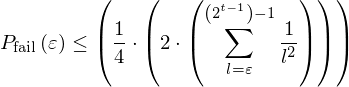

In [ ]:
X12 = Relation(X11).update(Y25)
X12.proven({epsInDomain})

In [ ]:
X13 = Relation(X12).update(X12.rhs.ungroup(1, assumptions=groupAndUngroupAssumptions))
X13.proven({epsInDomain})

In [ ]:
Y26 = simplifyQuarterTimesTwo.rhsSubstitute(X13.rhs.group(0,2, assumptions=groupAndUngroupAssumptions))
Y26.proven({epsInDomain})

In [ ]:
X14 = Relation(X13).update(Y26)
X14.proven({epsInDomain})

In [ ]:
sumIntegrateIneq1

In [ ]:
inverseSqrdIsMonDecFunc

In [ ]:
sumIntegrateIneq1

In [ ]:
epsStrictUpperBound.deriveRelaxed({epsInDomain})

In [ ]:
deduceInIntegers(shiftedPosDomain.lowerBound, {epsInDomain})
deduceInIntegers(shiftedPosDomain.upperBound)
Y27 = sumIntegrateIneq1.specialize({Operation(f,l):X14.rhs.operands[1].summand, x:l}).specialize({a:shiftedPosDomain.lowerBound,b:shiftedPosDomain.upperBound})
Y27.proven({epsInDomain})

In [ ]:
boundedInvSqrdIntegral

In [ ]:
deducePositive(eps, {epsInDomain}).applyTransitivity(epsStrictUpperBound).proven({epsInDomain})
deduceInRealsPos(epsStrictUpperBound.rhs, {epsInDomain}).proven({epsInDomain})

In [ ]:
Y28 = boundedInvSqrdIntegral.specialize({a:eps, b:epsStrictUpperBound.rhs})
Y28.proven({epsInDomain})

In [ ]:
lLowerBound = Y28.lhs.domain.deduceMemberLowerBound(l, {epsInDomain})
lLowerBound.deriveReversed().applyTransitivity(deducePositive(eps, {epsInDomain})).proven({epsInDomain, In(l, Y28.lhs.domain)})
Y29 = Y28.deriveShifted(Fraction(one, Exponentiate(eps, two)), assumptions={epsInDomain})
Y29.proven({epsInDomain})

In [ ]:
Y30 = autoSubstitute(Y29, 'commute', [], {'assumptions':{epsInDomain}}, superExpr=Y29.lhs).applyTransitivity(Y27)
Y30.proven({epsInDomain})

In [ ]:
ineqThm5

In [ ]:
Y30.deriveReversed().proven({epsInDomain})
deduceInReals(Fraction(one,two))
deducePositive(Fraction(one, two))
deduceInReals(Y30.lhs, {epsInDomain})
deduceInReals(Y30.rhs, {epsInDomain})
Y31 = ineqThm5.specialize({a:Y30.rhs, b:Y30.lhs, c:Fraction(one,two)})
Y31.proven({epsInDomain})

In [ ]:
X15 = Relation(X14).update(Y31)
X15.proven({epsInDomain})

In [ ]:
X15.generalize(eps, domain=epsInDomain.domain).qed()